In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [15]:
# 示例数据
study_labels = ['Wilcox: Sweden, 0-12', 'Wilcox: Sweden, 13-17', 'Wilcox: Sweden, 18-25',
                'Niederkrotenthaler: Sweden, 0-10', 'Niederkrotenthaler: Sweden, >10',
                'LV Burrell: Norway, 0-10', 'LV Burrell: Norway, 10-17', 'LV Burrell: Norway, 18-24',  
                'Ho: China Taiwan, 0-13', 'Ho: China Taiwan, 13-18', 'Ho: China Taiwan, >18',
                ]
effect_sizes = np.array([3.0, 3.1, 1.3,
                         2.93, 2.36,
                         1.96, 2.97, 1.59,
                         3.67, 4.36, 2.68,
                         ])
ci_low = np.array([1.7, 2.1, 0.9,
                   1.67, 1.46,
                   1.04, 1.95, 0.97,
                   0.8, 2.48, 2.23,
                   ])
ci_high = np.array([5.3, 4.6, 1.9,
                    5.15, 3.80,
                    3.72, 4.51, 2.60,
                    6.57, 6.23, 3.13,
                    ])

child_labels = ['Wilcox: Sweden, 0-12', 'LV Burrell: Norway, 0-10', 'Ho: China Taiwan, 0-13', ]
child_effect_sizes = np.array([3.0, 1.96, 3.67, ])
child_ci_low = np.array([1.7, 1.04, 0.8, ])
child_ci_high = np.array([5.3, 3.72, 6.57, ])

adolescent_labels = ['Wilcox: Sweden, 13-17', 'LV Burrell: Norway, 10-17', 'Ho: China Taiwan, 13-18', ]
adolescent_effect_sizes = np.array([3.1, 2.97, 4.36, ])
adolescent_ci_low = np.array([2.1, 1.95, 2.48, ])
adolescent_ci_high = np.array([4.6, 4.51, 6.23, ])

adult_labels = ['Wilcox: Sweden, 18-25', 'LV Burrell: Norway, 18-24', 'Ho: China Taiwan, >18', ]
adult_effect_sizes = np.array([1.3, 1.59, 2.68, ])
adult_ci_low = np.array([0.9, 0.97, 2.23, ])
adult_ci_high = np.array([1.9, 2.60, 3.13, ])

In [16]:
# 计算权重
child_weights = 1 / ((child_ci_high - child_ci_low) / (2 * 1.96))**2

# 计算加权平均效应大小
child_weighted_effect_size = np.sum(child_weights * child_effect_sizes) / np.sum(child_weights)

# 计算标准误差
child_se_combined = np.sqrt(1 / np.sum(child_weights))

# 计算效应大小的置信区间
child_ci_low_combined = child_weighted_effect_size - 1.96 * child_se_combined
child_ci_high_combined = child_weighted_effect_size + 1.96 * child_se_combined


# 计算权重
adolescent_weights = 1 / ((adolescent_ci_high - adolescent_ci_low) / (2 * 1.96))**2

# 计算加权平均效应大小
adolescent_weighted_effect_size = np.sum(adolescent_weights * adolescent_effect_sizes) / np.sum(adolescent_weights)

# 计算标准误差
adolescent_se_combined = np.sqrt(1 / np.sum(adolescent_weights))

# 计算效应大小的置信区间
adolescent_ci_low_combined = adolescent_weighted_effect_size - 1.96 * adolescent_se_combined
adolescent_ci_high_combined = adolescent_weighted_effect_size + 1.96 * adolescent_se_combined


# 计算权重
adult_weights = 1 / ((adult_ci_high - adult_ci_low) / (2 * 1.96))**2

# 计算加权平均效应大小
adult_weighted_effect_size = np.sum(adult_weights * adult_effect_sizes) / np.sum(adult_weights)

# 计算标准误差
adult_se_combined = np.sqrt(1 / np.sum(adult_weights))

# 计算效应大小的置信区间
adult_ci_low_combined = adult_weighted_effect_size - 1.96 * adult_se_combined
adult_ci_high_combined = adult_weighted_effect_size + 1.96 * adult_se_combined

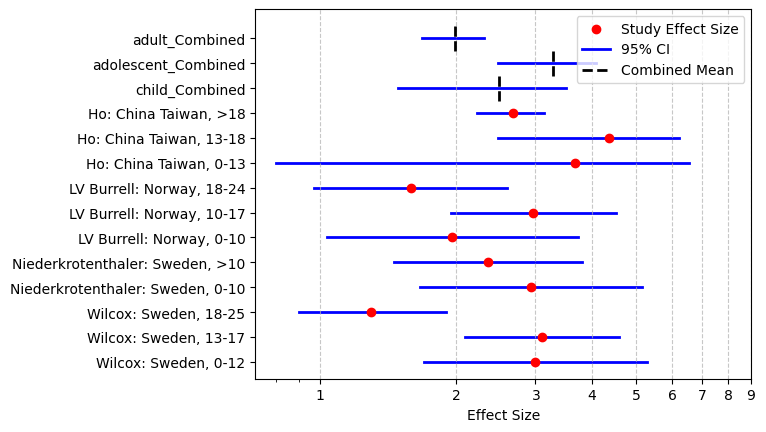

In [21]:
# 创建森林图
fig, ax = plt.subplots()

# 绘制效应大小的点
ax.scatter(effect_sizes, range(len(study_labels)), color='red', zorder=5, label='Study Effect Size')

# 绘制置信区间的线（独立研究）
for i, label in enumerate(study_labels):
    ax.plot([ci_low[i], ci_high[i]], [i, i], color='blue', linewidth=2, zorder=1)

# 绘制置信区间的线（合并效应）
ax.plot([child_ci_low_combined, child_ci_high_combined], [len(study_labels), len(study_labels)], color='blue', linewidth=2, zorder=1, label='95% CI')

# 绘制中间线
ax.plot([child_weighted_effect_size, child_weighted_effect_size], [len(study_labels) - 0.5, len(study_labels) + 0.5], color='black', linewidth=2, zorder=10, label='Combined Mean', linestyle='--')

# 绘制置信区间的线（合并效应）
ax.plot([adolescent_ci_low_combined, adolescent_ci_high_combined], [len(study_labels) + 1, len(study_labels) + 1], color='blue', linewidth=2, zorder=1)

# 绘制中间线
ax.plot([adolescent_weighted_effect_size, adolescent_weighted_effect_size], [len(study_labels) + 1 - 0.5, len(study_labels) + 1 + 0.5], color='black', linewidth=2, zorder=10, linestyle='--')

# 绘制置信区间的线（合并效应）
ax.plot([adult_ci_low_combined, adult_ci_high_combined], [len(study_labels) + 2, len(study_labels) + 2], color='blue', linewidth=2, zorder=1)

# 绘制中间线
ax.plot([adult_weighted_effect_size, adult_weighted_effect_size], [len(study_labels) + 2 - 0.5, len(study_labels) + 2 + 0.5], color='black', linewidth=2, zorder=10, linestyle='--')

# 设置y轴标签
ax.set_yticks(range(len(study_labels) + 3))
ax.set_yticklabels(study_labels + ['child_Combined'] + ['adolescent_Combined'] + ['adult_Combined'])

ax.set_xscale('log')

# 手动设置刻度
xticks = [1, 2, 3, 4, 5, 6, 7, 8, 9,]  # 你希望显示的非对数刻度
ax.set_xticks(xticks)
ax.set_xticklabels([f'${val}$' for val in xticks])

# 添加网格线
ax.grid(axis='x', linestyle='--', alpha=0.7)

# 添加标签
ax.set_xlabel('Effect Size')
ax.legend()

# 显示图形
plt.show()